<a href="https://colab.research.google.com/github/RITIK-12/safe-to-fly/blob/main/Notebooks/AI_in_FD_Decision_Tree_Classifier_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AIFD_project/Work_2/notebooks/df_combined_multiclass.csv')
df

,time,phi,psi,theta,mode,Ax,Ay,Az,east,north,course,alt,vel,climb,vel_3d,Gx,Gy,Gz,S0,S1,S2,C0,C1,C2,Throttle,Volt,Amp,Watt,mAh,Wh,Ps,Pdyn_AD,temp,qnh,amsl_baro,airspeed,TAS,D_roll,D_pitch,D_course,D_x,D_y,D_altitude,D_climb,D_airspeed,m1,m2,add1,add2,fault
0,44.0,-0.012684,3.128628,-0.075276,0.0,0.385938,0.111523,-9.750977,36028090.44,4.813616e+08,3328.00,189.07188,0.0968,-0.1000,0.139597,-0.004541,-0.002881,-0.004639,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.390279,0.025436,0.315154,0.000471,0.005825,-1.0,1.921144,18.700001,-1.0,0.0,1.770933,1.787068,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
1,44.1,-0.012709,3.128594,-0.075270,0.0,0.380859,0.106446,-9.752735,36028090.94,4.813616e+08,3328.00,189.07288,0.0818,-0.1000,0.129298,-0.005127,-0.003174,-0.004834,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.386227,0.028483,0.352725,0.000472,0.005841,-1.0,1.865325,18.700001,-1.0,0.0,1.745056,1.760955,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
2,44.2,-0.012701,3.128564,-0.075245,0.0,0.376172,0.102734,-9.745898,36028090.56,4.813616e+08,3328.00,189.07168,0.1064,-0.1088,0.152847,-0.004150,-0.002734,-0.004053,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.381286,0.032623,0.403797,0.000473,0.005858,-1.0,1.672796,18.700001,-1.0,0.0,1.652509,1.667564,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
3,44.3,-0.012707,3.128566,-0.075279,0.0,0.363282,0.095703,-9.742188,36028090.06,4.813616e+08,3328.00,189.07018,0.1364,-0.1188,0.181011,-0.004346,-0.003857,-0.005420,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.376344,0.036763,0.454869,0.000474,0.005874,-1.0,1.673503,18.700001,-1.0,0.0,1.652944,1.668003,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
4,44.4,-0.012700,3.128508,-0.075287,0.0,0.375000,0.113477,-9.741211,36028090.00,4.813616e+08,3328.00,189.06120,0.1136,-0.0936,0.147259,-0.004346,-0.003760,-0.005127,1042.0,1410.0,1410.0,21.0,0.0,-29.0,0.0,12.371403,0.040903,0.505941,0.000476,0.005891,-1.0,1.911660,18.700001,-1.0,0.0,1.766297,1.782388,0.0,0.0,0.0,0.0,0.0,235.0,0.0,12.0,1.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62123,3269.5,-0.017212,-3.020877,-0.070188,0.0,0.433594,0.118360,-9.661523,36028053.68,4.813609e+08,76.00,184.99924,0.2824,-0.5476,0.616640,0.008691,0.008398,-0.005029,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.599711,0.029245,0.309990,1.644927,18.341418,-1.0,0.005620,25.799999,-1.0,0.0,0.099524,0.100412,0.0,0.0,0.5,48.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0
62124,3269.6,-0.015179,-3.021151,-0.069231,0.0,0.454883,0.147265,-9.584179,36028051.62,4.813609e+08,221.18,185.03406,0.3008,-0.4552,0.556362,0.013232,0.003369,-0.001563,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.600156,0.031232,0.331078,1.644928,18.341427,-1.0,-0.187527,25.799999,-1.0,0.0,0.000000,0.000000,0.0,0.0,0.5,48.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0
62125,3269.7,-0.014398,-3.020987,-0.068787,0.0,0.475977,0.130860,-9.684180,36028048.12,4.813609e+08,434.68,185.08856,0.3608,-0.3452,0.506397,-0.000293,-0.000390,-0.001367,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.601391,0.034544,0.366239,1.644929,18.341436,-1.0,-0.376094,25.799999,-1.0,0.0,0.000000,0.000000,0.0,0.0,0.5,48.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0
62126,3269.8,-0.013408,-3.020862,-0.068531,0.0,0.499805,0.146680,-9.663867,36028046.66,4.813609e+08,503.00,185.11382,0.2916,-0.3168,0.443057,-0.003369,-0.003564,-0.001855,1043.0,1410.0,1410.0,36.0,0.0,0.0,0.0,10.602627,0.037856,0.401400,1.644930,18.341446,-1.0,-0.653622,25.799999,-1.0,0.0,0.000000,0.000000,0.0,0.0,0.5,49.0,102.0,270.0,4.0,12.0,1.0,1.0,0.0,0.0,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


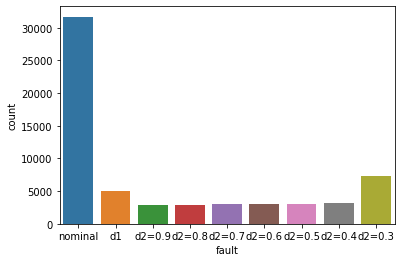

In [ ]:
import seaborn as sns
g = sns.countplot(df['fault'])
g.set_xticklabels(['nominal','d1','d2=0.9','d2=0.8','d2=0.7','d2=0.6','d2=0.5','d2=0.4','d2=0.3'])
plt.show()

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.40)

In [ ]:
X_train.shape

(37276, 49)

In [ ]:
X_test.shape

(24852, 49)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.76
Accuracy of Decision Tree classifier on test set: 0.76


In [ ]:
pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12652
           1       1.00      1.00      1.00      1980
           2       0.00      0.00      0.00      1195
           3       0.00      0.00      0.00      1218
           4       0.00      0.00      0.00      1210
           5       0.00      0.00      0.00      1197
           6       0.00      0.00      0.00      1229
           7       0.17      1.00      0.30      1272
           8       1.00      1.00      1.00      2899

    accuracy                           0.76     24852
   macro avg       0.35      0.44      0.37     24852
weighted avg       0.71      0.76      0.72     24852



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
cm = confusion_matrix(y_test, pred)
cm

array([[12652,     0,     0,     0,     0,     0,     0,     0,     0],
       [    0,  1980,     0,     0,     0,     0,     0,     0,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1195,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1218,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1210,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1197,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1229,     0],
       [    0,     0,     0,     0,     0,     0,     0,  1272,     0],
       [    0,     0,     0,     0,     0,     0,     0,     0,  2899]])

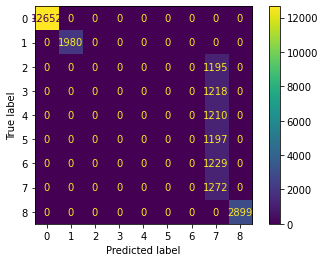

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()